### GETTING DATA

 Import Necessary libraries

In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

Change the directory 

In [2]:
cd C:\Users\Hardik Airen\CV ASSIGNMENT\Vision_task_dataset_public

C:\Users\Hardik Airen\CV ASSIGNMENT\Vision_task_dataset_public


Read pickle files using "read_pickle"

In [3]:
df_train = pd.read_pickle("train_image.pkl")

In [4]:
df_test = pd.read_pickle("test_image.pkl")

In [5]:
train_label = pd.read_pickle("train_label.pkl")

Convert df_train, df_test , train_label to NumPy array

In [6]:
df_train = np.array(df_train)

In [7]:
df_test = np.array(df_test)

In [8]:
train_label = np.array(train_label)

Get the shape of above NumPy arrays

In [9]:
df_train.shape

(8000, 784)

In [10]:
df_test.shape

(2000, 784)

In [11]:
train_label.shape

(8000,)

Analysis of image using "imshow". Reshape the array to (28,28) pixels to get the image. For example image number 6 of training data and image number 556 of test data

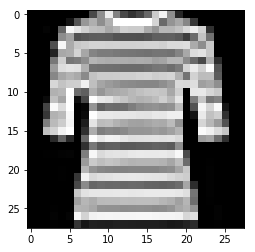

In [12]:
plt.imshow(np.array(df_train[5]).reshape((28, 28)), cmap=cm.Greys_r)

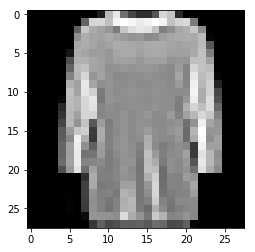

In [13]:
plt.imshow(np.array(df_test[555]).reshape((28, 28)), cmap=cm.Greys_r)

Convert the classes 0,2,3,6 to 0,1,2,3 respectively for the analysis and modelling

In [15]:
def func(b):
    if(b==0):
        return 0
    if(b==2):
        return 1
    if(b==3):
        return 2
    if(b==6):
        return 3
    
train_label = np.vectorize(func)(train_label)

Plot the Histogram for the 4 classes to get the number of images of each class

(array([2000.,    0.,    0., 2000.,    0.,    0., 2000.,    0.,    0.,
        2000.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

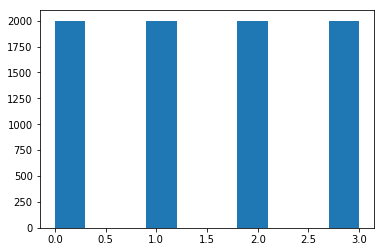

In [16]:
plt.hist(train_label, bins=10, range=None, normed=None, weights=None, density=None)

### BASIC MODEL LIKE RANDOM FOREST

Import the libraries for different models like Logistic Regression,Random Forests etc.

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Observing the behaviour by just trying Random Forest model. I got the accuracy 100%. Which means it is the case of Overfitting.

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(df_train, train_label)
Y_prediction = random_forest.predict(df_test)
random_forest.score(df_train, train_label)
acc_random_forest = round(random_forest.score(df_train, train_label) * 100, 2)
print(round(acc_random_forest,2,), "%")


100.0 %


Split the training data(Number of examples=8000) to X_train(size=7200) and X_test(size=800) using "train_test_split". Using X_train for validation accuracy.

In [18]:
 from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_train, train_label, test_size=0.1, random_state=42)

Now apply the Random Forests model. Getting the accuracy of 81.5 on the X_test data(random 800 images from training data)

In [21]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_test,y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

81.5 %


Observing how model is doing using the code given below to get scores,mean and standard deviation

In [22]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.84626039 0.81440443 0.82662968 0.83611111 0.86527778 0.83588317
 0.84144645 0.84561892 0.82197497 0.82058414]
Mean: 0.8354191039345313
Standard Deviation: 0.014386884415434792


### ENSEMBLE MODEL

Applying the Ensemble model to improve the accuracy.I used Logistic Regression,Random Forests,Decision Trees

In [ ]:
from sklearn.ensemble import VotingClassifier
LogClf = LogisticRegression()
RndClf = RandomForestClassifier()
DecClf = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators = [('rf',RndClf) , ('dt' , DecClf)],voting='soft')
voting_clf.fit(X_train,y_train)

As the shapes of y_train is (7200,). Reshaping it into (7200,1) for to get metrics like accuracy score.

In [31]:
y_train.shape

(7200,)

In [38]:
y_train = y_train.reshape((-1,1))

In [39]:
y_train.shape

(7200, 1)

Get the predicted class for X_test(size=800) using "predict"

In [40]:
from sklearn.metrics import accuracy_score
for clf in (RndClf ,DecClf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

G:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Reshape y_pred and y_test from (800,)  to (800,1)

In [48]:
y_pred = y_pred.reshape((-1,1))
y_test = y_test.reshape((-1,1))

Import classification report which will print the Precision , Recall , F1 Score for each class

In [62]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       217
           1       0.78      0.79      0.78       195
           2       0.86      0.83      0.84       180
           3       0.62      0.63      0.63       208

   micro avg       0.75      0.75      0.75       800
   macro avg       0.76      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



As the accuracy using Random Forests and other models and also the Ensemble model was not much appreciable now using CNN(Convolutional Neural Networks) to get the better accuracy

### CNN MODEL USING KERAS

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
 
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

Reshaping X_train from (7200,784) to (7200,28,28,1) and X_test from (800,784) to (800,28,28,1) to fit them in CNN model

In [83]:
X_train = X_train.reshape(7200,28,28,1)
X_test = X_test.reshape(800,28,28,1)

Use one hot encoding for y_train and y_test. This will convert categorical values to one-hot encoding.For eg. class 2 will be represented in form [0,1,0,0] and class 6 in form [0,0,0,1]

In [84]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

Using TensorFlow backend.


array([0., 0., 0., 1.], dtype=float32)

Architecture of CNN Model
1st layer with 32 filters and Acitivation function "Relu" and so on.Using Softmax Regression activation function after the final layer to get the predicted output.

In [139]:
pool_size= (2,2)

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
 

model.add(Conv2D(64, kernel_size=3, activation ='relu'))
model.add(Conv2D(64, kernel_size=3, activation ='relu'))
model.add(Conv2D(64, kernel_size=3, activation ='relu'))
 

model.add(Conv2D(128, kernel_size=3, activation ='relu'))
model.add(Conv2D(128, kernel_size=3, activation ='relu'))
model.add(Conv2D(128, kernel_size=3, activation ='relu'))
 
model.add(Flatten())
model.add(Dense(4, activation = "softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 128)       73856     
__________

Compile the Sequential Model with Adam Optimizer and checking it with metric "accuracy"

In [140]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model with validation data X_train and y_train and running it with Epochs=30

In [144]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 30)

Train on 7200 samples, validate on 800 samples
Epoch 1/30
7200/7200 [==============================] - 204s 28ms/step - loss: 0.3545 - acc: 0.8812 - val_loss: 0.5255 - val_acc: 0.8363
Epoch 2/30
7200/7200 [==============================] - 187s 26ms/step - loss: 0.1843 - acc: 0.9337 - val_loss: 0.6492 - val_acc: 0.8075
Epoch 3/30
7200/7200 [==============================] - 208s 29ms/step - loss: 0.1170 - acc: 0.9571 - val_loss: 0.6497 - val_acc: 0.8050
Epoch 4/30
7200/7200 [==============================] - 218s 30ms/step - loss: 0.0859 - acc: 0.9699 - val_loss: 0.7408 - val_acc: 0.8187
Epoch 5/30
7200/7200 [==============================] - 217s 30ms/step - loss: 0.0585 - acc: 0.9769 - val_loss: 0.6794 - val_acc: 0.8488
Epoch 6/30
7200/7200 [==============================] - 224s 31ms/step - loss: 0.0344 - acc: 0.9878 - val_loss: 0.7722 - val_acc: 0.8375
Epoch 7/30
7200/7200 [==============================] - 233s 32ms/step - loss: 0.0376 - acc: 0.9863 - val_loss: 0.9942 - val_acc: 0

As I increased the number of Epochs the validation accuracy (val_acc). For 15 epochs I got the val_acc around 85% and with 30 epochs val_acc increased to 87.12%

### IMAGE DATA GENERATOR

As the training data is small using Image Data Generator could be helpful. This ImageDataGenerator() will generate more Tensor arrays.

In [112]:
datagen = ImageDataGenerator()

In [122]:
from keras.models import Model
from keras.layers import Input, Dense

Running ImageDataGenerator which generate new images and also normalizing them

In [134]:
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True, samplewise_center=False, featurewise_std_normalization=True, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=True, vertical_flip=False, rescale=1/255.0, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

Fitting X_train to Image Data Generator

In [135]:
datagen.fit(X_train)

Running the fit_generator with "flow" command which will take the datagen as input and number of Epochs=3 to analyze the performance

In [131]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch= 256, epochs=3)

Epoch 1/3
256/256 [==============================] - 74s 288ms/step - loss: 0.3968 - acc: 0.8461
Epoch 2/3
256/256 [==============================] - 80s 312ms/step - loss: 0.3957 - acc: 0.8475
Epoch 3/3
256/256 [==============================] - 83s 322ms/step - loss: 0.3767 - acc: 0.8579


Got the accuracy of 85.8%. But this is not a validation accuracy.

Checking the model on validation data i.e. (X_test,y_test)

In [133]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_test, y_test),
                    steps_per_epoch= 1000, epochs=3)

Epoch 1/3
1000/1000 [==============================] - 354s 354ms/step - loss: 0.3895 - acc: 0.8502 - val_loss: 9.2802 - val_acc: 0.3750
Epoch 2/3
1000/1000 [==============================] - 347s 347ms/step - loss: 0.3839 - acc: 0.8518 - val_loss: 10.0697 - val_acc: 0.3125
Epoch 3/3
1000/1000 [==============================] - 352s 352ms/step - loss: 0.3889 - acc: 0.8499 - val_loss: 9.5047 - val_acc: 0.3525


Got a poor validation accuracy of 35.25% after 3 epochs. Thus the fit generator is not performing well on this training data 

Sticking with the original CNN model which perfoms the best among all. The accuracy can be increased a little more by increasing the number of Epochs.

Converting the test data to shape (2000,28,28,1) for class prediction through CNN model

In [147]:
df_test=df_test.reshape((2000,28,28,1))

Use "predict" command for the prediction based on the CNN Model

In [284]:
Y_prediction = model.predict(df_test)

As the class predictions is in the form of one-hot encoding. So converting Y_prediction to categorical array using "argmax"

In [285]:
Y_pred = np.argmax(Y_prediction,1)

Got the NumPy array Y_pred the form required with classes encoded as 0,1,2,3

In [286]:
Y_pred

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

Plotting the Histogram of Y_pred to check the prediction results

(array([532.,   0.,   0., 511.,   0.,   0., 491.,   0.,   0., 466.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

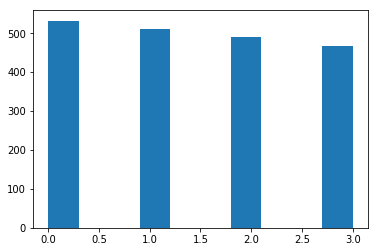

In [287]:
plt.hist(Y_pred, bins=10, range=None, normed=None, weights=None, density=None)

Decoding the classes 0,1,2,3 to 0,2,3,6 again using a function. These were the original classes to predict in the problem

In [288]:
def func(b):
    if(b==0):
        return 0
    if(b==1):
        return 2
    if(b==2):
        return 3
    if(b==3):
        return 6
    
Y_pred = np.vectorize(func)(Y_pred)

Got the required Y_pred array which predict the class for given test data (df_test.pkl)

In [289]:
Y_pred

array([0, 0, 0, ..., 6, 6, 6])

(array([532.,   0.,   0., 511.,   0., 491.,   0.,   0.,   0., 466.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

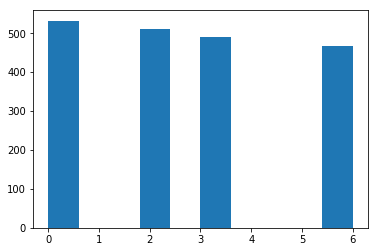

In [290]:
plt.hist(Y_pred, bins=10, range=None, normed=None, weights=None, density=None)

Checking the results. For eg. test example number 1000 predicted a pullover

In [232]:
Y_pred[999]

2

Getting the image of test example 1000 and the prediction of Pullover was right

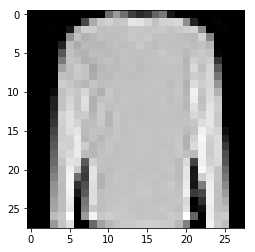

In [233]:
plt.imshow(np.array(df_test[999]).reshape((28, 28)), cmap=cm.Greys_r)

Similarly checking on some more test examples like T-shirt

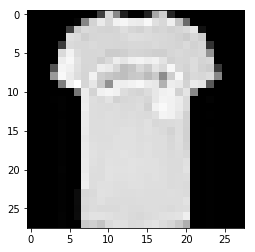

In [234]:
plt.imshow(np.array(df_test[0]).reshape((28, 28)), cmap=cm.Greys_r)

In [235]:
Y_pred[0]

0

Class 3 is a dress while class 0 is a T-shirt and class 2 is a Pullover

In [237]:
Y_pred[1999]

6

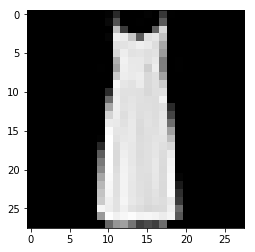

In [239]:
plt.imshow(np.array(df_test[1000]).reshape((28, 28)), cmap=cm.Greys_r)

### SUBMISSION

Reshaping Y_pred Numpy array to (2000,1) for submission

In [260]:
Y_pred=Y_pred.reshape((2000,1))

Creating an index column to be added in a submission file

In [281]:
indexn = np.arange(2000)

In [282]:
indexn

array([   0,    1,    2, ..., 1997, 1998, 1999])

Create a csv file which will contain Test_Image_Index and Predicted_class

In [291]:
submission = pd.DataFrame({
        "Test_image_index": indexn,
        "predicted_class": Y_pred
    })
submission.to_csv('Hardik Airen.csv', index=False)